In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\sunit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor 

# Load data
train_data = pd.read_csv(r'C:\Users\sunit\OneDrive\Desktop\house_prediction\train.csv')
test_data = pd.read_csv(r'C:\Users\sunit\OneDrive\Desktop\house_prediction\test.csv')

# Save ID and target
train_ID = train_data['Id']
test_ID = test_data['Id']
y = train_data['SalePrice']

# Drop ID and SalePrice from train
train_data.drop(['Id', 'SalePrice'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)

# Combine train and test for preprocessing
combined = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Fill missing values with mode
combined = combined.fillna(combined.mode().iloc[0])

# One-hot encode categorical variables
combined = pd.get_dummies(combined)

# Separate train and test
X = combined[:len(y)]
X_test = combined[len(y):]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse}")

# Predict on test set
final_predictions = model.predict(X_test_scaled)

# Prepare submission
submission = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': final_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully as 'submission.csv'!")


Validation RMSE: 26157.831094524598
Submission file created successfully as 'submission.csv'!


In [9]:
final_predictions = model.predict(X_test_scaled)

# Submission file
submission = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': final_predictions
})
submission.to_csv(r'C:\Users\sunit\OneDrive\Desktop\house_prediction\submission.csv', index=False)
print("Submission file created!")


Submission file created!


     Id  SalePrice
0  1461  127699.30
1  1462  158519.90
2  1463  181772.31
3  1464  185595.80
4  1465  199014.38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


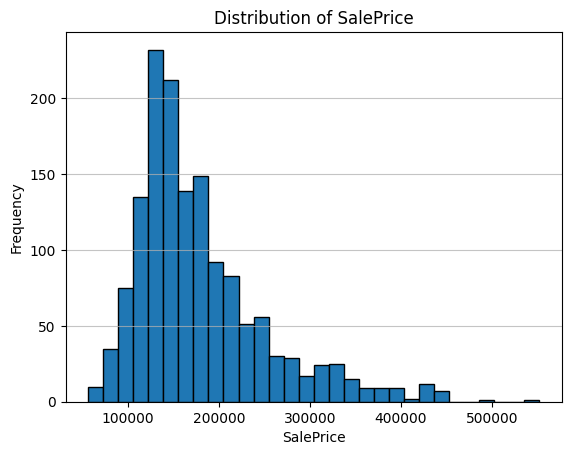

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('submission.csv')

# Display the first few rows and summary of the dataframe
print(df.head())
print(df.info())

# Plot a histogram of the 'SalePrice'
plt.hist(df['SalePrice'], bins=30, edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Save the plot
plt.savefig('saleprice_histogram.png')

In [11]:
best_house = df.loc[df['SalePrice'].idxmax()]
print("The house with the highest SalePrice is:")
print(best_house)

The house with the highest SalePrice is:
Id             2629.0
SalePrice    551997.5
Name: 1168, dtype: float64
